In [1]:
import skxray.speckle_analysis as spe_vis
import skxray.roi as roi
import skxray.correlation as corr
import skxray.core as core

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

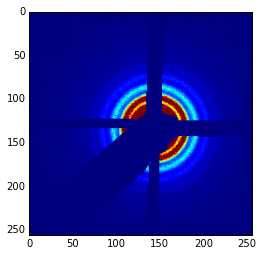

In [2]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data = np.asarray(duke_data)    

avg_img = np.average(duke_data, axis=0)

mask4 = np.load(data_dir+"new_mask4.npy")

mask = np.load(data_dir+"Luxi_duke_mask.npy")

N_mask = ~(mask + mask4)

plt.imshow(N_mask*avg_img, vmax=1e0)
plt.show()

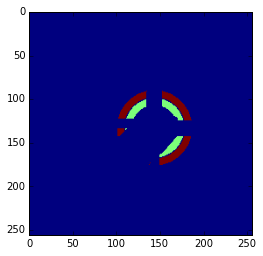

In [4]:
mask_data1 = N_mask*duke_data[0:2000]
mask_data2 = N_mask*duke_data[2001: 3500]
mask_data3 = N_mask*duke_data[3501:5000]


inner_radius = 26
width = 8
spacing = 1
num_rings = 2

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, (133, 143), avg_img.shape)

rings_mask = rings*N_mask

plt.imshow(rings_mask)
plt.show()

In [175]:
image_sets = (mask_data1, mask_data2, mask_data3)

mean_int_sets, index_list = spe_vis.mean_intensity_sets(image_sets, rings_mask)

combine_intensity = spe_vis.combine_mean_intensity(mean_int_sets, index_list)


# use mean_int_sets.pop(0) to remove the first element in the list last element pop(-1)

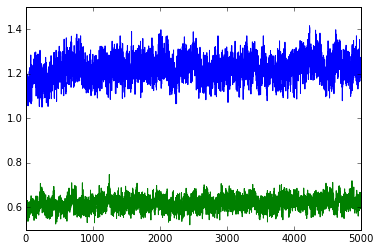

In [176]:
plt.plot(combine_intensity)
plt.show()

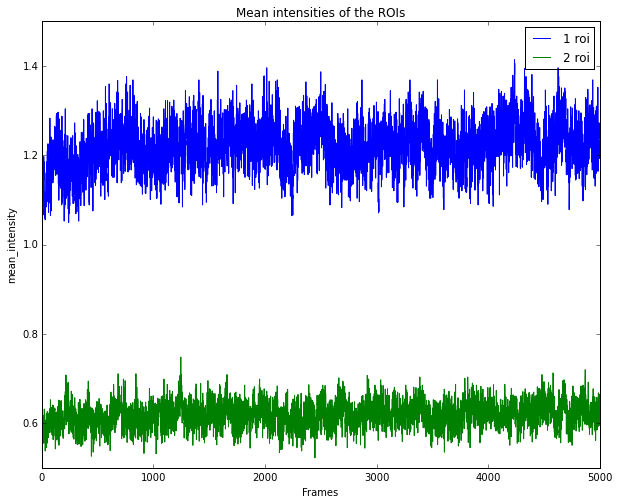

In [177]:
def combine_intensity_plotter(ax, mean_intensity_sets, index_list,
                           num_rois, title="Mean intensities of the ROIs",
                           figsize=(10, 12), xlabel="Frames",
                           ylabel="mean_intensity"):
    """
    Parameters
    ----------
    num_rois : int

    mean_intensity : array

    title : str, optional

    fig_size : tuple, optional

    x_label : str, optional

    y_label : str, optional

    """
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    for i in range(num_rois):
        axes.plot(mean_intensity_sets[:, i], label=str(i+1)+" roi")
    plt.legend()
    
    
fig, axes = plt.subplots(figsize=(10,8))
combine_intensity_plotter(axes, combine_intensity, (1, 2), num_rois=2)
plt.show()


In [ ]:
def mean_intensity_plotter(ax, mean_intensity_sets, index_list,
                           num_rois, title="Mean intensities", xlabel="Frames",
                           ylabel="Mean Intensity"):
    """
    Parameters
    ----------
    num_rois : int

    mean_intensity : array

    title : str, optional

    fig_size : tuple, optional

    x_label : str, optional

    y_label : str, optional

    """
    #if np.all(map(lambda x: x == index_list[0], index_list):
    axes[num_rois-1].set_xlabel(xlabel)
    for i in range(num_rois):
        axes[i].set_ylabel(ylabel)
        axes[i].set_title(title+" for ROI " + str(i+1))
        total = 0
        first = 0
        x = [len(elm) for elm in mean_intensity_sets]
        x_val=np.arange(sum(x))
        for j in range(len(mean_intensity_sets)):
            total += x[j]
            axes[i].plot(x_val[first:total], mean_intensity_sets[j][:, i],
                         label=str(j)+" image_set")
            first = total
    plt.legend()
     #else:
     #   raise ValueError("Labels list for the image sets are different")
    
    
fig, axes = plt.subplots(2, figsize=(6,6), sharex=True)
mean_intensity_plotter(axes, mean_int_sets, (1, 2), num_rois=2)
plt.show()

In [ ]:
x = [len(elm) for elm in mean_int_sets]

In [181]:
x[0]

2000

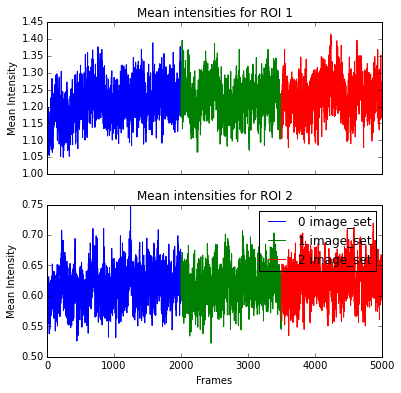

In [182]:
def mean_intensity_plotter(ax, mean_intensity_sets, index_list,
                           num_rois, title="Mean intensities", xlabel="Frames",
                           ylabel="Mean Intensity", image_set_names=None):
    """
    Parameters
    ----------
    num_rois : int

    mean_intensity : array

    title : str, optional

    fig_size : tuple, optional

    x_label : str, optional

    y_label : str, optional

    """
    if np.all(map(lambda x: x == index_list[0], index_list)):
        axes[num_rois-1].set_xlabel(xlabel)
        for i in range(num_rois):
            axes[i].set_ylabel(ylabel)
            axes[i].set_title(title+" for ROI " + str(i+1))
            total = 0
            first = 0
            x = [len(elm) for elm in mean_intensity_sets]
            x_val=np.arange(sum(x))
            for j in range(len(mean_intensity_sets)):
                total += x[j]
                axes[i].plot(x_val[first:total], mean_intensity_sets[j][:, i],
                         label=str(j)+" image_set")
                first = total
        plt.legend()
    else:
        raise ValueError("Labels list for the image sets are different")
    
    
fig, axes = plt.subplots(2, figsize=(6,6), sharex=True)
mean_intensity_plotter(axes, mean_int_sets, ((1, 2), (1,2)), num_rois=2)
plt.show()

In [183]:
len(index_list[0])

2

In [184]:
index_list2 = ((1,2,3), (1,2,3))

In [185]:
len(index_list2[0])

3

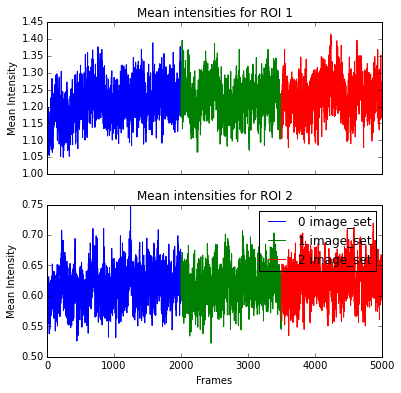

In [186]:
def mean_intensity_plotter(ax, mean_intensity_sets, index_list,
                           title="Mean intensities",
                           xlabel="Frames", ylabel="Mean Intensity"):
    """
    This will plot mean intensities for ROIS' of the labeled array
    for different image sets.
    
    Parameters
    ----------
    ax : Axes

    num_rois : int

    mean_intensity_sets : list

    index_list : list

    title : str, optional
        title of the plot

    x_label : str, optional
        x axis label

    y_label : str, optional
        y axis label

    """
    if np.all(map(lambda x: x == index_list[0], index_list)):
        ax[len(index_list[0])-1].set_xlabel(xlabel)
        for i in range(len(index_list[0])):
            ax[i].set_ylabel(ylabel)
            ax[i].set_title(title+" for ROI " + str(i+1))
            total = 0
            first = 0
            x = [len(elm) for elm in mean_intensity_sets]
            x_val=np.arange(sum(x))
            for j in range(len(mean_intensity_sets)):
                total += x[j]
                ax[i].plot(x_val[first:total], mean_intensity_sets[j][:, i],
                         label=str(j)+" image_set")
                first = total
        plt.legend()
    else:
        raise ValueError("Labels list for the image sets are different")
        
        
fig, axes = plt.subplots(2, figsize=(6,6), sharex=True)
mean_intensity_plotter(axes, mean_int_sets, ((1, 2), (1,2)))
plt.show()


In [187]:
def roi_kymograph(ax, kymograph_data, title="ROI Kymograph", fig_size=(8, 10),
                  xlabel="pixel list", ylabel="Frames", cmap='gist_earth'):
    """
    Parameters
    ----------
    kymograph_data : array

    title : str, optional

    fig_size : tuple, optional

    x_label : str, optional

    y_label : str, optional

    c_map : str, optional

    """
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.imshow(kymograph_data, cmap=cmap)
